In [29]:
from a72_utilities import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF

In [30]:
xas_data, xas_masks, xas_energies = load_registered_xas()

In [31]:
cr_xas = ('/Users/apple/Sync/Research/Alloy 72/Registration/Cr_shifted.tif')
ni_xas = ('/Users/apple/Sync/Research/Alloy 72/Registration/Ni_shifted.tif')
ti_xas = ('/Users/apple/Sync/Research/Alloy 72/Registration/Ti_shifted.tif')
al_xas = ('/Users/apple/Sync/Research/Alloy 72/Registration/Al_shifted.tif')
fe_xas = ('/Users/apple/Sync/Research/Alloy 72/Registration/Fe_shifted.tif')
xas_filenames = {"Cr":cr_xas,"Ni":ni_xas,"Ti":ti_xas,"Al":al_xas,"Fe":fe_xas}
for element, filename in xas_filenames.items():
    make_txt_label(np.min(xas_energies[element]),np.max(xas_energies[element]),filename)


input size:  (72, 1024, 1024)
output size:  (72,)
input size:  (87, 1024, 1024)
output size:  (87,)
input size:  (91, 1024, 1024)
output size:  (91,)
input size:  (77, 1024, 1024)
output size:  (77,)
input size:  (77, 1024, 1024)
output size:  (77,)


(72, 964, 964)
Cr


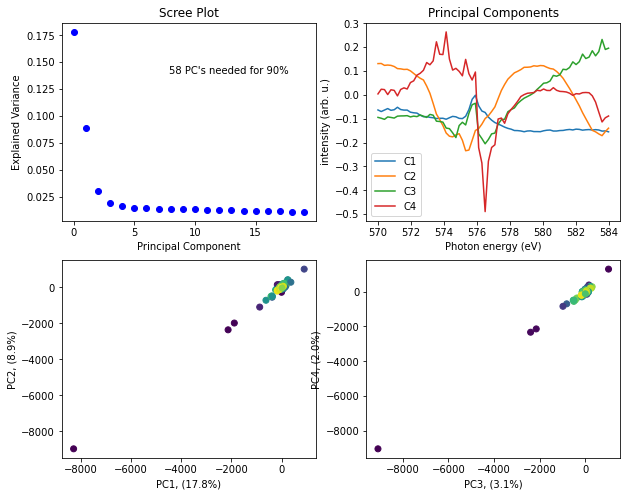

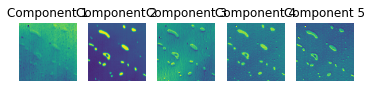

(87, 964, 964)
Ni


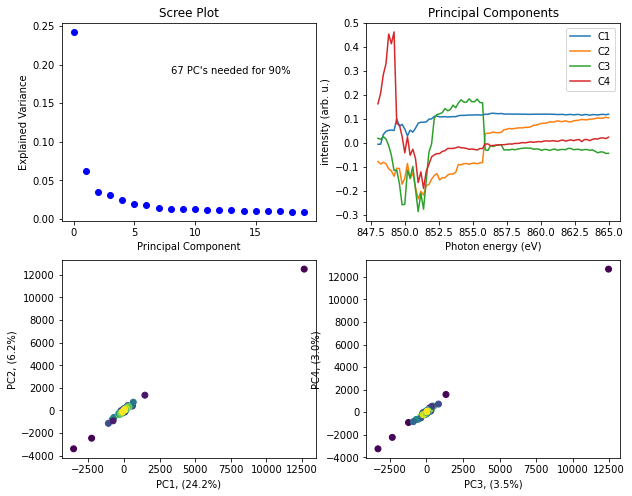

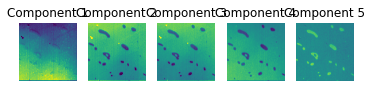

(91, 964, 964)
Ti


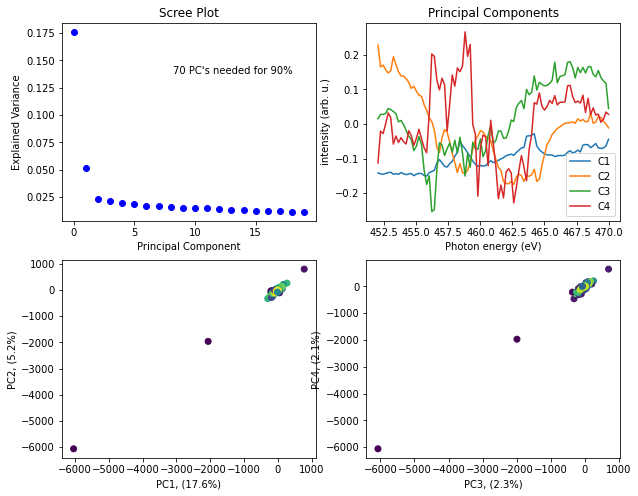

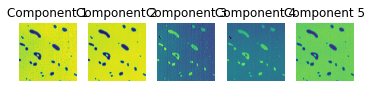

(77, 964, 964)
Al


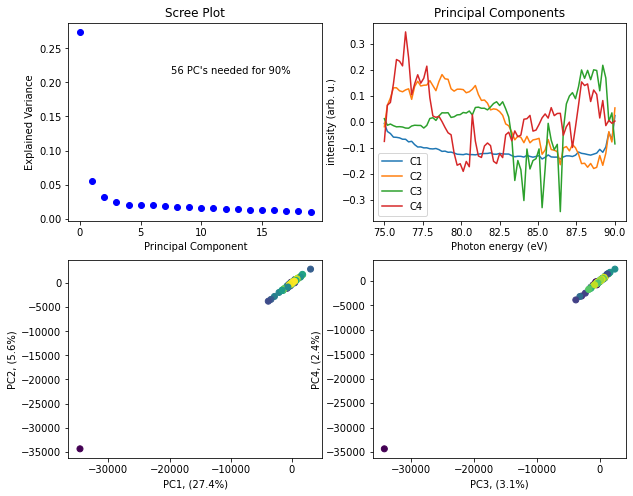

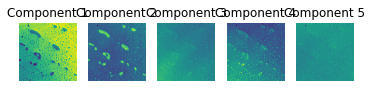

(77, 964, 964)
Fe


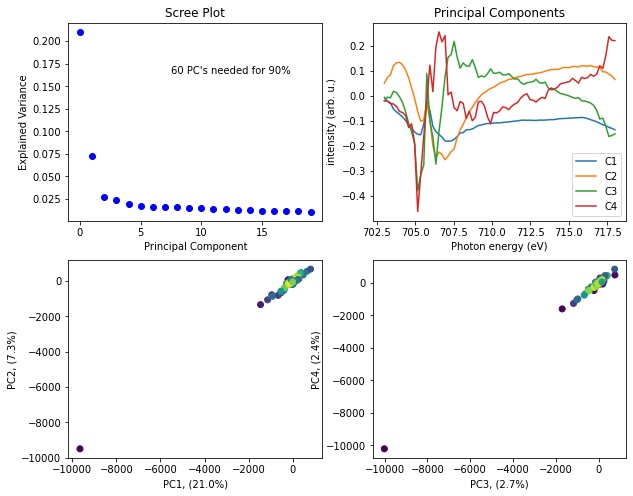

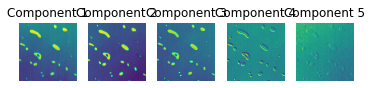

In [32]:
minmaxscaler = MinMaxScaler()
pca = PCA()
elements_scores = {}


for i, (element,xas) in enumerate(xas_data.items()):
    #print(i,element, xas_data)
    element_data = trim_edges(xas)
    print(element_data.shape)

    element_NxM = np.reshape(element_data,(len(element_data),element_data.shape[1]*element_data.shape[2])).T
    scaled_data = minmaxscaler.fit_transform(element_NxM.T)
    pca_results = pca.fit(scaled_data.T)
    scores = pca_results.transform(element_NxM)
    elements_scores[element] = scores
    print(element)
    plot_pca_results(pca_results,scores,e_values=xas_energies[element])
    plt.show()
    show_score_imgs(scores,5,imsize=element_data.shape[1])
    plt.show()



In [8]:
""""Read the data from the NNMA with smoothness weighting from mantis"""

import os

# Specify the directory to search and the file extension to look for
directory = "/Users/apple/Sync/Research/Alloy 72/NNMA"
img_extension = ".tif"
component_extension = '.csv'

component_list = {}
image_list = {}
# Loop through the directory
for root, dirs, files in os.walk(directory):
    for file in files:
        # Check if the file ends with .csv
        if file.endswith(component_extension):
            component_list[file] = pd.read_csv(os.path.join(root, file),comment='*')

        elif file.endswith(img_extension):
            image_list[file] = io.imread(os.path.join(root,file))

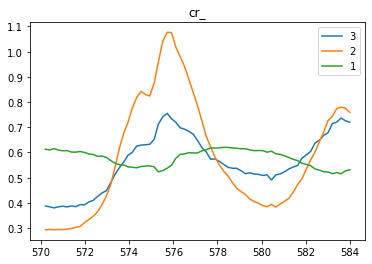

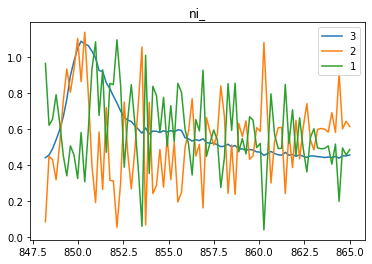

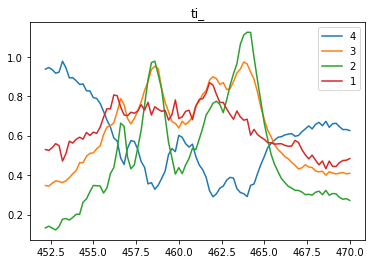

No handles with labels found to put in legend.


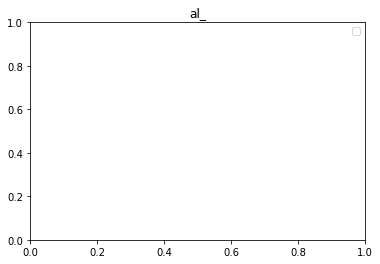

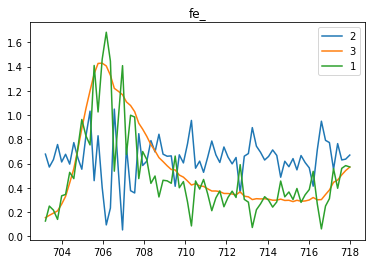

In [27]:
elements = ['cr_','ni_','ti_','al_','fe_']
for element in elements:
    matching_key = [key for key in component_list.keys() if element in key]
    for key in matching_key:
        plt.plot(component_list[key].iloc[:,0],component_list[key].iloc[:,1],label=str(key[-5:-4]))
    plt.title(element)
    plt.legend()
    plt.show()
    